# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution
</div>
****

In [53]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [54]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [55]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [56]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>We will use Chi square test. CLT does not apply as the variable is categorical.</p>
<ul>
<li> null hypothesis : No discrimination exists.</li>
<li> alternate hypothesis : discrimination exists</li>
</ul>
</div>

In [57]:
w = data[data.race=='w']
b = data[data.race=='b']

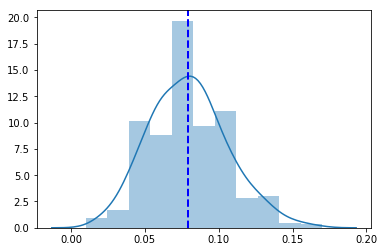

In [58]:
bootstrap = []

for i in range(1, 700):
    bootstrap.append(np.mean(data.sample(100, random_state=i).call))
    
    
sns.distplot(bootstrap, bins=11)
plt.axvline(np.mean(bootstrap), color='b', linestyle='dashed', linewidth=2, label='mean')
plt.show()

In [59]:
print('confidence interval',np.percentile(bootstrap, [2.5, 97.5]))
print('Standard Error', np.std(bootstrap))
print('margin of error', np.mean(bootstrap)-1.96*np.std(bootstrap)+math.sqrt(700), np.mean(bootstrap)+1.96*np.std(bootstrap)+math.sqrt(700))

confidence interval [ 0.03  0.14]
Standard Error 0.0269038355803
margin of error 26.4841807345 26.58964377


<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

###degree of freedom : 1
### level of significance : .05 
### critical value : 3.841
<P>Total black records: 2435. Total white records: 2435</P>

<table>
<tr>
<th>Observed</th>
</tr>
<tr>
<td></td>
<td>Call</td>
<td>No call</td>
</tr>
<tr>
<td>Black</td>
<td>157</td>
<td>2278</td>
</tr>
<tr>
<td></td>
<td>235</td>
<td>2200</td>
</tr>
</table>

<table>
<tr>
<th>Expected</th>
</tr>
<tr>
<td></td>
<td>Call</td>
<td>No call</td>
</tr>
<tr>
<td>Black</td>
<td>196</td>
<td>2239</td>
</tr>
<tr>
<td></td>
<td>196</td>
<td>2239</td>
</tr>
</table>

In [60]:
(157-196)**2/196 + (235-196)**2/196 + (2278-2239)**2/2239 + (2200-2239)**2/2239

16.87905041427022

3.841(critical value)< 16.87(Observed value)

Null hypothesis rejected. Racism exists.

In [61]:
np.mean(data.sample(100).call)

0.03999999910593033

Conclusion:
    
On analysing the total 4870 records we found that name or race play's a important role in the job market.  